In [2]:

import pandas as pd
train = pd.read_csv("/Users/b32/Desktop/ㅇㅇㅇㅇㅇㅇ/기초데이터/train_data.csv", encoding='euc-kr')
test = pd.read_csv("/Users/b32/Desktop/ㅇㅇㅇㅇㅇㅇ/기초데이터/test_data.csv", encoding='euc-kr')

In [53]:
import math

def lab2rgb(l_s, a_s, b_s):
    var_Y = (l_s + 16) / 116.0
    var_X = a_s / 500.0 + var_Y
    var_Z = var_Y - b_s / 200.0

    if var_Y**3 > 0.008856:
        var_Y = var_Y**3
    else:
        var_Y = (var_Y - 16/116) / 7.787
    if var_X**3 > 0.008856:
        var_X = var_X**3
    else:
        var_X = (var_X - 16/116) / 7.787
    if var_Z**3 > 0.008856:
        var_Z = var_Z**3
    else:
        var_Z = (var_Z - 16/116) / 7.787

    X = 95.047 * var_X
    Y = 100.000 * var_Y
    Z = 108.883 * var_Z

    var_X = X / 100.0
    var_Y = Y / 100.0
    var_Z = Z / 100.0

    var_R = var_X * 3.2406 + var_Y * -1.5372 + var_Z * -0.4986
    var_G = var_X * -0.9689 + var_Y * 1.8758 + var_Z * 0.0415
    var_B = var_X * 0.0557 + var_Y * -0.2040 + var_Z * 1.0570

    if var_R > 0.0031308:
        var_R = 1.055 * (var_R ** (1/2.4)) - 0.055
    else:
        var_R = 12.92 * var_R
    if var_G > 0.0031308:
        var_G = 1.055 * (var_G ** (1/2.4)) - 0.055
    else:
        var_G = 12.92 * var_G
    if var_B > 0.0031308:
        var_B = 1.055 * (var_B ** (1/2.4)) - 0.055
    else:
        var_B = 12.92 * var_B

    R = var_R * 255.0
    G = var_G * 255.0
    B = var_B * 255.0

    return R, G, B

# 이 함수는 주어진 L*a*b* 값을 RGB 값으로 변환합니다.
# 예를 들어:
R, G, B = lab2rgb(70.4715,5.8965,6.3415)
print(R, G, B)


188.05980877536268 168.3889888816363 161.11015680204076


In [5]:

data = pd.concat([train, test], axis=0)

data = data.set_index(['index'])
data

,Unnamed: 0,소재_경사정보_V1,소재_경사정보_V2,소재_경사정보_V3,소재_경사정보_V4,소재_경사정보_V5,소재_경사정보_V6,소재_경사정보_V7,소재_경사정보_V8,소재_경사정보_V9,...,배합_염료3_Black_prop,배합_염료1_Grey_prop,배합_염료2_Grey_prop,배합_염료3_Grey_prop,배합_염료2_Brown_prop,배합_염료1_Brown_prop,배합_염료3_Brown_prop,색상_L*,색상_a*,색상_b*
index,,,,,,,,,,,,,,,,,,,,,
1748,1748,PET 재생 섬유,300,96,Semi Dull,Draw Textured Yarn,88,Filaments,150,150,...,0,0,0,0,0,0,0,20.7300,8.2000,-20.2100
3730,3730,PET 재생 섬유,300,96,Semi Dull,Draw Textured Yarn,96,Filaments,150,150,...,0,0,0,0,0,0,0,72.4890,25.1515,84.0940
308,308,PET 재생 섬유,300,96,Semi Dull,Draw Textured Yarn,88,Filaments,150,150,...,0,0,0,0,0,0,0,50.1900,6.8500,-20.2500
930,930,PET 재생 섬유,300,96,Semi Dull,Draw Textured Yarn,88,Filaments,150,150,...,0,0,0,0,0,0,0,50.6250,62.5350,17.1050
49,49,PET 재생 섬유,300,96,Semi Dull,Draw Textured Yarn,88,Filaments,150,150,...,0,0,0,0,1,0,0,57.1100,34.0900,55.9900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,1094,PET 재생 섬유,300,96,Semi Dull,Draw Textured Yarn,88,Filaments,150,150,...,0,0,0,0,0,0,1,54.2400,9.0675,9.6225
1895,1895,PET 재생 섬유,300,96,Semi Dull,Draw Textured Yarn,88,Filaments,150,150,...,0,0,0,0,0,0,0,65.3550,43.9665,22.5465
1020,1020,PET 재생 섬유,300,96,Semi Dull,Draw Textured Yarn,88,Filaments,150,150,...,0,0,0,0,0,0,0,34.3850,-18.0250,1.6150


In [15]:
condition_zero = (data['배합_염료1_Yellow_prop'] == 0.0) & (data['배합_염료1_Blue_prop'] == 0.0) & (data['배합_염료1_Red_prop'] == 0.0) & (data['배합_염료1_Black_prop'] == 0.0) & (data['배합_염료1_Grey_prop'] == 0.0)  & (data['배합_염료1_Brown_prop'] == 0.0)
data = data[~condition_zero]

data.to_csv("/Users/b32/Desktop/ㅇㅇㅇㅇㅇㅇ/염료회사1배율분석.csv")

In [14]:
data.iloc[:,70:90]

,전처리_정보_V34,배합_염료1_Yellow,배합_염료1_Red,배합_염료1_Blue,배합_염료2_Yellow,배합_염료2_Red,배합_염료2_Blue,배합_염료3_Yellow,배합_염료3_Red,배합_염료3_Blue,배합_염료1_Black,배합_염료2_Black,배합_염료3_Black,배합_염료1_Grey,배합_염료2_Grey,배합_염료3_Grey,배합_염료2_Brown,배합_염료1_Brown,배합_염료3_Brown,배합_조제_V1
index,,,,,,,,,,,,,,,,,,,,
1748,1200,0.000,2.000,4.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3
3730,1200,3.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3
308,1200,0.000,0.167,0.333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3
930,1200,0.000,2.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3
988,1200,0.050,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,1200,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.3
906,1200,0.000,0.067,0.033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3
1895,1200,0.167,0.333,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3


In [17]:
# 필요한 열에 대해 소수 첫 번째 자리까지만 표기
data['배합_염료1_Yellow_prop'] = data['배합_염료1_Yellow_prop'].round(1)
data['배합_염료1_Blue_prop'] = data['배합_염료1_Blue_prop'].round(1)
data['배합_염료1_Red_prop'] = data['배합_염료1_Red_prop'].round(1)
data['배합_염료1_Black_prop'] = data['배합_염료1_Black_prop'].round(1)
data['배합_염료1_Grey_prop'] = data['배합_염료1_Grey_prop'].round(1)
data['배합_염료1_Brown_prop'] = data['배합_염료1_Brown_prop'].round(1)

# 변경된 데이터 저장
data.to_csv("/Users/b32/Desktop/ㅇㅇㅇㅇㅇㅇ/염료회사분석/염료회사1_1배율분석.csv")


In [18]:
combination_counts = data.groupby(['배합_염료1_Yellow_prop', '배합_염료1_Blue_prop', '배합_염료1_Red_prop','배합_염료1_Black_prop','배합_염료1_Grey_prop','배합_염료1_Brown_prop']).size().reset_index(name='Count')

In [20]:
combination_counts

,배합_염료1_Yellow_prop,배합_염료1_Blue_prop,배합_염료1_Red_prop,배합_염료1_Black_prop,배합_염료1_Grey_prop,배합_염료1_Brown_prop,Count
0,0.0,0.0,0.0,0,0,1,162
1,0.0,0.0,0.0,0,1,0,163
2,0.0,0.0,0.0,1,0,0,163
3,0.0,0.0,1.0,0,0,0,156
4,0.0,0.3,0.7,0,0,0,111
5,0.0,0.7,0.3,0,0,0,104
6,0.0,1.0,0.0,0,0,0,153
7,0.3,0.0,0.7,0,0,0,104
8,0.3,0.3,0.3,0,0,0,106
9,0.3,0.7,0.0,0,0,0,106


In [24]:
# 조합별로 그룹화하고 정렬
sorted_data = data.groupby(['배합_염료1_Yellow_prop', '배합_염료1_Blue_prop', '배합_염료1_Red_prop', '배합_염료1_Black_prop', '배합_염료1_Grey_prop', '배합_염료1_Brown_prop']).size().reset_index(name='Count').sort_values(by=['배합_염료1_Yellow_prop', '배합_염료1_Blue_prop', '배합_염료1_Red_prop', '배합_염료1_Black_prop', '배합_염료1_Grey_prop', '배합_염료1_Brown_prop'])

# 결과 출력
print(sorted_data)


    배합_염료1_Yellow_prop  배합_염료1_Blue_prop  배합_염료1_Red_prop  배합_염료1_Black_prop   
0                  0.0               0.0              0.0                  0  \
1                  0.0               0.0              0.0                  0   
2                  0.0               0.0              0.0                  1   
3                  0.0               0.0              1.0                  0   
4                  0.0               0.3              0.7                  0   
5                  0.0               0.7              0.3                  0   
6                  0.0               1.0              0.0                  0   
7                  0.3               0.0              0.7                  0   
8                  0.3               0.3              0.3                  0   
9                  0.3               0.7              0.0                  0   
10                 0.7               0.0              0.3                  0   
11                 0.7               0.3

In [46]:
# 각 조합에 대한 모든 행을 포함하는 데이터프레임 생성
grouped_data = data.groupby(['배합_염료1_Yellow_prop', '배합_염료1_Blue_prop', '배합_염료1_Red_prop', '배합_염료1_Black_prop', '배합_염료1_Grey_prop', '배합_염료1_Brown_prop']).apply(lambda x: x)

# 결과 출력
grouped_data.iloc[:,170:]

배합_염료3_Brown_prop   
배합_염료1_Yellow_prop 배합_염료1_Blue_prop 배합_염료1_Red_prop 배합_염료1_Black_prop 배합_염료1_Grey_prop 배합_염료1_Brown_prop index                      
0.0                0.0              0.0             0                 0                1                 3403                   0  \
                                                                                                         402                    0   
                                                                                                         380                    0   
                                                                                                         3447                   0   
                                                                                                         399                    0   
...                                                                                                                           ...   
1.0                0.0              0.0             0                 0                0                 3723                   0   
                                                                                                         333                    0   
                                                                                                         1966                   0   
                                                                                                         2198                   0   
                                                                                                         1006                   0   

                                                                                                                  색상_L*   
배합_염료1_Yellow_prop 배합_염료1_Blue_prop 배합_염료1_Red_prop 배합_염료1_Black_prop 배합_염료1_Grey_prop 배합_염료1_Brown_prop index            
0.0                0.0              0.0             0                 0                1                 3403   70.4715  \
                                                                                                         402    54.4050   
                                                                                                         380    76.9800   
                                                                                                         3447   55.2815   
                                                                                                         399    55.1900   
...                                                                                                                 ...   
1.0                0.0              0.0             0                 0                0                 3723   77.4365   
                                                                                                         333    87.0350   
                                                                                                         1966   78.7850   
                                                                                                         2198   68.8550   
                                                                                                         1006   81.7400   

                                                                                                                  색상_a*   
배합_염료1_Yellow_prop 배합_염료1_Blue_prop 배합_염료1_Red_prop 배합_염료1_Black_prop 배합_염료1_Grey_prop 배합_염료1_Brown_prop index            
0.0                0.0              0.0             0                 0                1                 3403    5.8965  \
                                                                                                         402     9.3500   
                                                                                                         380     4.2750   
                                                                                                         3447    9.0115   
                                            

# 여기서부터 색상출력

In [49]:
grouped_data_1=grouped_data[grouped_data["Combination_ID"]==0]
grouped_data_2=grouped_data[grouped_data["Combination_ID"]==1]
grouped_data_3=grouped_data[grouped_data["Combination_ID"]==2]
grouped_data_4=grouped_data[grouped_data["Combination_ID"]==3]
grouped_data_5=grouped_data[grouped_data["Combination_ID"]==4]
grouped_data_6=grouped_data[grouped_data["Combination_ID"]==5]
grouped_data_7=grouped_data[grouped_data["Combination_ID"]==6]
grouped_data_8=grouped_data[grouped_data["Combination_ID"]==7]
grouped_data_9=grouped_data[grouped_data["Combination_ID"]==8]
grouped_data_10=grouped_data[grouped_data["Combination_ID"]==9]
grouped_data_11=grouped_data[grouped_data["Combination_ID"]==10]
grouped_data_12=grouped_data[grouped_data["Combination_ID"]==11]

In [70]:
rgb_list=[]
for index, row in grouped_data_11.iterrows():
    R,G,B=lab2rgb(row["색상_L*"],row["색상_a*"],row["색상_b*"])
    rgb_list.append([R,G,B])

rgb_df= pd.DataFrame(rgb_list,index=grouped_data_11.index,columns=["R","G","B"])

# 원래 데이터프레임에 RGB 데이터프레임을 연결합니다.
df_rgb = pd.concat([grouped_data_11, rgb_df], axis=1,)
    

In [71]:
df_rgb

Unnamed: 0   
배합_염료1_Yellow_prop 배합_염료1_Blue_prop 배합_염료1_Red_prop 배합_염료1_Black_prop 배합_염료1_Grey_prop 배합_염료1_Brown_prop index               
0.7                0.0              0.3             0                 0                0                 3392         3392  \
                                                                                                         2143         2143   
                                                                                                         2021         2021   
                                                                                                         1058         1058   
                                                                                                         2146         2146   
...                                                                                                                    ...   
                                                                                                         2181         2181   
                                                                                                         2087         2087   
                                                                                                         996           996   
                                                                                                         3397         3397   
                                                                                                         2029         2029   

                                                                                                               소재_경사정보_V1   
배합_염료1_Yellow_prop 배합_염료1_Blue_prop 배합_염료1_Red_prop 배합_염료1_Black_prop 배합_염료1_Grey_prop 배합_염료1_Brown_prop index              
0.7                0.0              0.3             0                 0                0                 3392   PET 재생 섬유  \
                                                                                                         2143   PET 재생 섬유   
                                                                                                         2021   PET 재생 섬유   
                                                                                                         1058   PET 재생 섬유   
                                                                                                         2146   PET 재생 섬유   
...                                                                                                                   ...   
                                                                                                         2181   PET 재생 섬유   
                                                                                                         2087   PET 재생 섬유   
                                                                                                         996    PET 재생 섬유   
                                                                                                         3397   PET 재생 섬유   
                                                                                                         2029   PET 재생 섬유   

                                                                                                                소재_경사정보_V2   
배합_염료1_Yellow_prop 배합_염료1_Blue_prop 배합_염료1_Red_prop 배합_염료1_Black_prop 배합_염료1_Grey_prop 배합_염료1_Brown_prop index               
0.7                0.0              0.3             0                 0                0                 3392          300  \
                                                                                                         2143          300   
                                                                                                         2021          300   
                                                                                                         1058          300   
                                                                                           

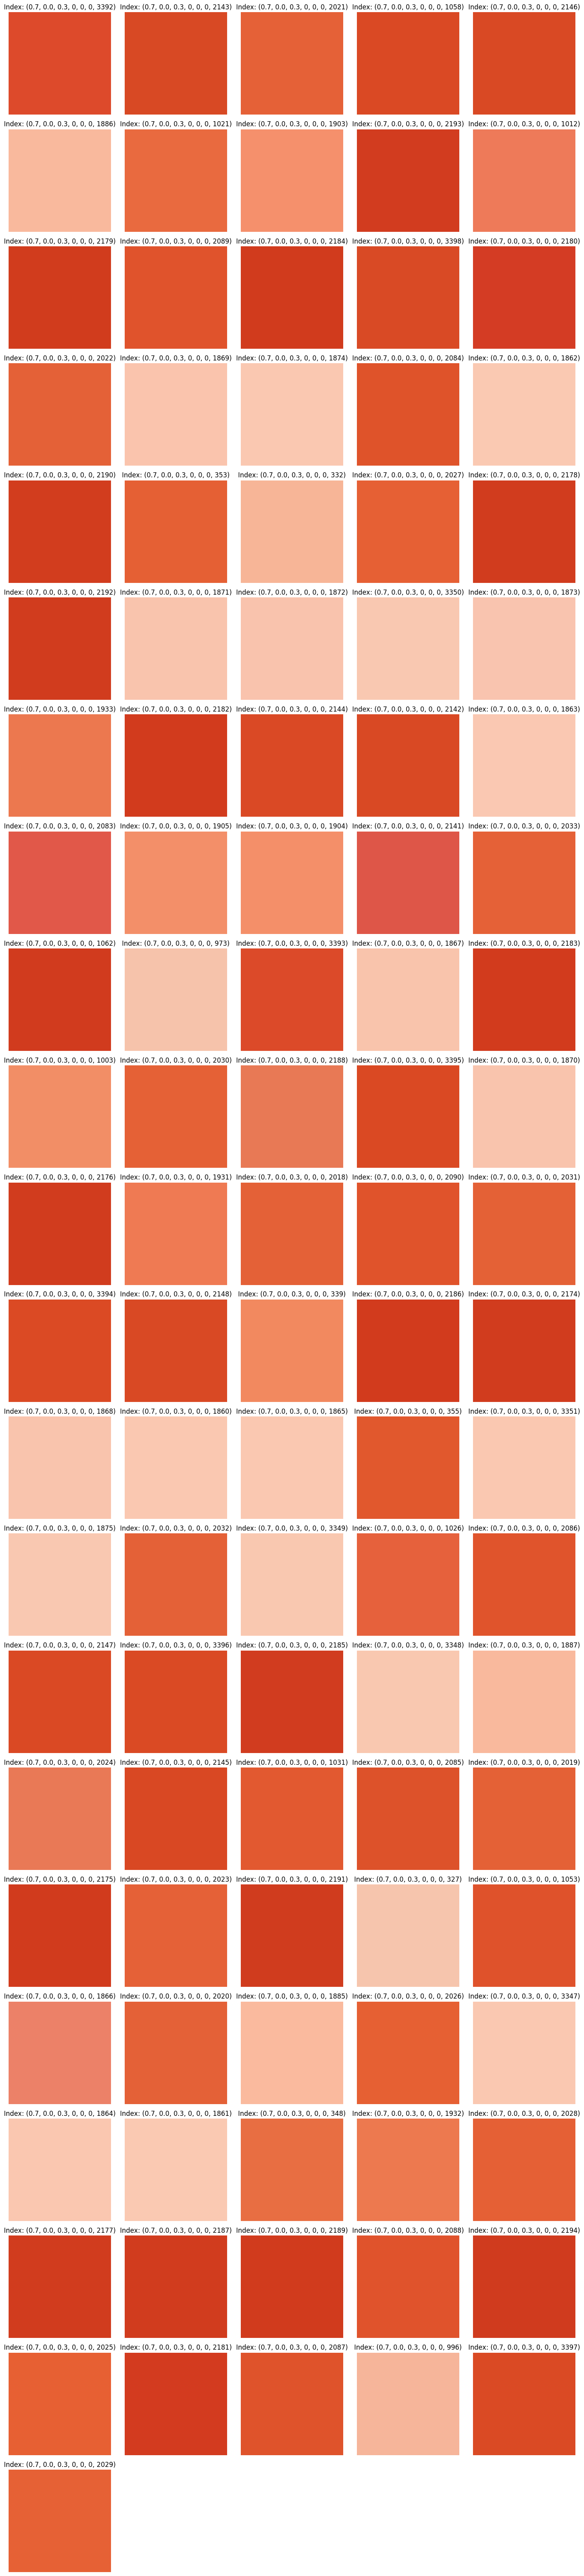

In [72]:

import matplotlib.pyplot as plt
import numpy as np  # numpy 임포트 추가

# 데이터프레임의 'R', 'G', 'B' 컬럼만 정규화합니다.
df_rgb_normalized = df_rgb[['R', 'G', 'B']] / 255

# 서브플롯의 크기를 결정합니다. 여기서는 5개의 열을 갖는 그리드로 설정합니다.
n_rows = len(df_rgb_normalized) // 5 + 1
n_cols = 5

# 시각화를 위한 준비
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*3))  # 전체 그림의 크기를 조정합니다.

# axs가 1차원 배열인 경우 2차원 배열로 변환합니다.
if n_rows == 1:
    axs = np.array([axs])

# 모든 서브플롯을 순회하며 RGB 색상을 표시합니다.
for i, (index, row) in enumerate(df_rgb_normalized.iterrows()):
    ax = axs[i // n_cols, i % n_cols]
    ax.imshow([[row.values]])  # RGB 색상으로 사각형을 그립니다.
    ax.set_title(f'Index: {index}')  # 서브플롯 위에 데이터프레임 인덱스를 표시합니다.
    ax.axis('off')  # 축을 숨깁니다.

# 남은 서브플롯을 숨깁니다.
for j in range(i+1, n_rows*n_cols):
    axs[j // n_cols, j % n_cols].axis('off')

plt.tight_layout()
plt.show()


In [33]:
# 처음 6개 염료 비율 피처와 마지막 3개 컬럼 선택
selected_data = data.iloc[:, list(range(6)) + [-3, -2, -1]]

# 결과 출력
selected_data


,Unnamed: 0,소재_경사정보_V1,소재_경사정보_V2,소재_경사정보_V3,소재_경사정보_V4,소재_경사정보_V5,색상_L*,색상_a*,색상_b*
index,,,,,,,,,
1748,1748,PET 재생 섬유,300,96,Semi Dull,Draw Textured Yarn,20.730,8.2000,-20.2100
3730,3730,PET 재생 섬유,300,96,Semi Dull,Draw Textured Yarn,72.489,25.1515,84.0940
308,308,PET 재생 섬유,300,96,Semi Dull,Draw Textured Yarn,50.190,6.8500,-20.2500
930,930,PET 재생 섬유,300,96,Semi Dull,Draw Textured Yarn,50.625,62.5350,17.1050
988,988,PET 재생 섬유,300,96,Semi Dull,Draw Textured Yarn,89.415,1.2900,30.8700
...,...,...,...,...,...,...,...,...,...
30,30,PET 재생 섬유,300,96,Semi Dull,Draw Textured Yarn,49.100,10.9200,9.4500
906,906,PET 재생 섬유,300,96,Semi Dull,Draw Textured Yarn,70.140,16.3500,-8.0650
1895,1895,PET 재생 섬유,300,96,Semi Dull,Draw Textured Yarn,65.355,43.9665,22.5465


In [42]:
# 각 조합에 대한 모든 행을 포함하는 데이터프레임 생성
grouped_data = data.groupby(['배합_염료1_Yellow_prop', '배합_염료1_Blue_prop', '배합_염료1_Red_prop', '배합_염료1_Black_prop', '배합_염료1_Grey_prop', '배합_염료1_Brown_prop']).apply(lambda x: x.iloc[:, -3:])

# 결과 출력
grouped_data.to_csv("/Users/b32/Desktop/ㅇㅇㅇㅇㅇㅇ/염료회사분석/염료회사배율분석 소수점통일화 정렬2.csv")


In [40]:
# 각 조합에 대한 고유 라벨 생성
data['Combination_Label'] = data.groupby(['배합_염료1_Yellow_prop', '배합_염료1_Blue_prop', '배합_염료1_Red_prop', '배합_염료1_Black_prop', '배합_염료1_Grey_prop', '배합_염료1_Brown_prop']).ngroup()

# 새로운 데이터프레임 생성
labeled_data = data.copy()

# 결과 출력
labeled_data


,Unnamed: 0,소재_경사정보_V1,소재_경사정보_V2,소재_경사정보_V3,소재_경사정보_V4,소재_경사정보_V5,소재_경사정보_V6,소재_경사정보_V7,소재_경사정보_V8,소재_경사정보_V9,...,배합_염료2_Grey_prop,배합_염료3_Grey_prop,배합_염료2_Brown_prop,배합_염료1_Brown_prop,배합_염료3_Brown_prop,색상_L*,색상_a*,색상_b*,Combination_ID,Combination_Label
index,,,,,,,,,,,,,,,,,,,,,
1748,1748,PET 재생 섬유,300,96,Semi Dull,Draw Textured Yarn,88,Filaments,150,150,...,0,0,0,0,0,20.730,8.2000,-20.2100,5,5
3730,3730,PET 재생 섬유,300,96,Semi Dull,Draw Textured Yarn,96,Filaments,150,150,...,0,0,0,0,0,72.489,25.1515,84.0940,12,12
308,308,PET 재생 섬유,300,96,Semi Dull,Draw Textured Yarn,88,Filaments,150,150,...,0,0,0,0,0,50.190,6.8500,-20.2500,5,5
930,930,PET 재생 섬유,300,96,Semi Dull,Draw Textured Yarn,88,Filaments,150,150,...,0,0,0,0,0,50.625,62.5350,17.1050,3,3
988,988,PET 재생 섬유,300,96,Semi Dull,Draw Textured Yarn,88,Filaments,150,150,...,0,0,0,0,0,89.415,1.2900,30.8700,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,30,PET 재생 섬유,300,96,Semi Dull,Draw Textured Yarn,88,Filaments,150,150,...,0,0,0,1,0,49.100,10.9200,9.4500,0,0
906,906,PET 재생 섬유,300,96,Semi Dull,Draw Textured Yarn,88,Filaments,150,150,...,0,0,0,0,0,70.140,16.3500,-8.0650,4,4
1895,1895,PET 재생 섬유,300,96,Semi Dull,Draw Textured Yarn,88,Filaments,150,150,...,0,0,0,0,0,65.355,43.9665,22.5465,7,7


In [41]:
# 'Combination_Label' 열을 맨 앞으로 이동
cols = labeled_data.columns.tolist()
cols = ['Combination_Label'] + [col for col in cols if col != 'Combination_Label']
labeled_data = labeled_data[cols]

# 'Combination_Label' 열 기준으로 내림차순으로 정렬
labeled_data_sorted = labeled_data.sort_values(by='Combination_Label', ascending=False)

# 결과 출력
labeled_data_sorted


,Combination_Label,Unnamed: 0,소재_경사정보_V1,소재_경사정보_V2,소재_경사정보_V3,소재_경사정보_V4,소재_경사정보_V5,소재_경사정보_V6,소재_경사정보_V7,소재_경사정보_V8,...,배합_염료1_Grey_prop,배합_염료2_Grey_prop,배합_염료3_Grey_prop,배합_염료2_Brown_prop,배합_염료1_Brown_prop,배합_염료3_Brown_prop,색상_L*,색상_a*,색상_b*,Combination_ID
index,,,,,,,,,,,,,,,,,,,,,
3379,12,3379,PET 재생 섬유,300,96,Semi Dull,Draw Textured Yarn,96,Filaments,150,...,0,0,0,0,0,0,74.6775,23.5015,84.8530,12
3685,12,3685,PET 재생 섬유,300,96,Semi Dull,Draw Textured Yarn,96,Filaments,150,...,0,0,0,0,0,0,88.0365,2.7780,39.1290,12
3697,12,3697,PET 재생 섬유,300,96,Semi Dull,Draw Textured Yarn,96,Filaments,150,...,0,0,0,0,0,0,82.0000,10.5855,63.0450,12
1038,12,1038,PET 재생 섬유,300,96,Semi Dull,Draw Textured Yarn,88,Filaments,150,...,0,0,0,0,0,0,88.6200,1.5700,30.2150,12
1071,12,1071,PET 재생 섬유,300,96,Semi Dull,Draw Textured Yarn,88,Filaments,150,...,0,0,0,0,0,0,74.6150,19.0850,72.7600,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,0,374,PET 재생 섬유,300,96,Semi Dull,Draw Textured Yarn,88,Filaments,150,...,0,0,0,0,1,0,76.8100,4.4650,6.5300,0
397,0,397,PET 재생 섬유,300,96,Semi Dull,Draw Textured Yarn,88,Filaments,150,...,0,0,0,0,1,0,56.4300,8.5450,9.0950,0
3410,0,3410,PET 재생 섬유,300,96,Semi Dull,Draw Textured Yarn,96,Filaments,150,...,0,0,0,0,1,0,55.8180,9.0655,9.0055,0


In [57]:
import pandas as pd

# 샘플 데이터프레임 생성
data = pd.DataFrame({
    'A': [1, 2, 3, 4],
    'B': [5, 6, 7, 8]
})

# A 컬럼의 값이 2보다 크면 B 컬럼 값을 두 배로 만들기
for index, row in data.iterrows():
    if row['A'] > 2:
        data.at[index, 'B'] = row['B'] * 2

print(data)


   A   B
0  1   5
1  2   6
2  3  14
3  4  16
